# ASA: International Data Quest: The Price of Progress

## Executive Summary

We used 3 indicators: GDP, HDI, and Suicide Rate

# Data Management: Reading, Preprocessing, Cleaning, and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import pycountry
import country_converter as coco
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH_HDI = "./External-Dataset/HDI.xlsx"
PATH_WDI = "./Dataset/WDICSV-rev.csv"
OUT_CLEAN = "./Output/merged_clean_panel.csv"
OUT_CLEAN2 = "./Output/merged_clean_panel2.csv"

In [3]:
df_hdi = pd.read_excel("./External-Dataset/HDI.xlsx")
# df_hdi = pd.read_excel("HDI.xlsx")

df_wdi = pd.read_csv("./Dataset/WDICSV-rev.csv")
# df = pd.read_csv("WDICSV-rev.csv")

In [4]:
print("HDI columns:", df_hdi.columns.tolist())
print("WDI columns sample:", df_wdi.columns[:10].tolist())

HDI columns: ['Country', 'Human Development Index (HDI) ', 'Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'GNI per capita rank minus HDI rank', 'HDI rank']
WDI columns sample: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965']


In [5]:
df_hdi.head()

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
0,Iceland,0.972,82.691,18.850590,13.908926,69116.93736,12,3
1,Norway,0.97,83.308,18.792850,13.117962,112710.0211,0,1
2,Switzerland,0.97,83.954,16.667530,13.949121,81948.90177,5,2
3,Denmark,0.962,81.933,18.704010,13.027321,76007.85669,4,4
4,Germany,0.959,81.378,17.309219,14.296372,64053.22124,13,6


In [6]:
df_wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.668330,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.783960,35.375216,NaN


In [7]:
df_hdi.columns = df_hdi.columns.str.strip()
df_hdi = df_hdi[['Country', 'Human Development Index (HDI)']].dropna()
df_hdi = df_hdi.rename(columns={
    'Country': 'Country Name',
    'Human Development Index (HDI)': 'HDI_2023'
})
df_hdi['Country Name'] = df_hdi['Country Name'].str.strip()

wdi_names = set(df_wdi['Country Name'].unique())
hdi_names = set(df_hdi['Country Name'].unique())

missing_in_wdi = sorted(list(hdi_names - wdi_names))
print("Negara di HDI tapi tidak ditemukan di WDI:", len(missing_in_wdi))
print(missing_in_wdi[:20])  # tampilkan sebagian

missing_in_hdi = sorted(list(wdi_names - hdi_names))
print("\nNegara di WDI tapi tidak ditemukan di HDI:", len(missing_in_hdi))
print(missing_in_hdi[:20])

Negara di HDI tapi tidak ditemukan di WDI: 25
['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', 'Congo (Democratic Republic of the)', "Côte d'Ivoire", 'Egypt', 'Eswatini (Kingdom of)', 'Gambia', 'Hong Kong, China (SAR)', 'Iran (Islamic Republic of)', "Korea (Democratic People's Rep. of)", 'Korea (Republic of)', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Palestine, State of', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines']

Negara di WDI tapi tidak ditemukan di HDI: 96
['Africa Eastern and Southern', 'Africa Western and Central', 'American Samoa', 'Arab World', 'Aruba', 'Bahamas, The', 'Bermuda', 'Bolivia', 'British Virgin Islands', 'Caribbean small states', 'Cayman Islands', 'Central Europe and the Baltics', 'Channel Islands', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)

In [8]:
# Cell 3 - Normalize & harmonize country name column
# Standardize whitespace
for df in [df_hdi, df_wdi]:
    df.columns = df.columns.str.strip()

# Make sure the key column is 'Country Name' across
# For df_wdi it appears to already use 'Country Name' in your earlier code
if 'Country Name' not in df_wdi.columns:
    # try possible variants
    for cand in ['Country', 'country', 'CountryName', 'Country name']:
        if cand in df_wdi.columns:
            df_wdi = df_wdi.rename(columns={cand: 'Country Name'})
            break

df_wdi['Country Name'] = df_wdi['Country Name'].str.strip()
if 'Country' in df_hdi.columns and 'Human Development Index (HDI)' in df_hdi.columns:
    df_hdi = df_hdi.rename(columns={'Country': 'Country Name', 'Human Development Index (HDI)': 'HDI_2023'})
    df_hdi['Country Name'] = df_hdi['Country Name'].str.strip()


In [9]:
# Cell 4 - If HDI is timeseries (country x year wide), transform to long
hdi_year_cols = [c for c in df_hdi.columns if str(c).isdigit() or (isinstance(c, str) and c.startswith('20'))]
if len(hdi_year_cols) > 0:
    # melt to long form: Country Name, Year, HDI
    df_hdi_long = df_hdi.melt(id_vars=['Country Name'], value_vars=hdi_year_cols,
                              var_name='Year', value_name='HDI')
    # ensure Year as string
    df_hdi_long['Year'] = df_hdi_long['Year'].astype(str)
    # keep as df_hdi_long
    df_hdi = df_hdi_long.rename(columns={'HDI': 'HDI_value'})
    print("Converted HDI to long timeseries with shape:", df_hdi.shape)
else:
    # assume df_hdi is single column 'HDI_2023'
    if 'HDI_2023' not in df_hdi.columns and 'HDI' in df_hdi.columns:
        df_hdi = df_hdi.rename(columns={'HDI': 'HDI_2023'})
    print("HDI appears non-timeseries. Columns:", df_hdi.columns.tolist())


HDI appears non-timeseries. Columns: ['Country Name', 'HDI_2023']


In [10]:
# Cell 5 - Prepare WDI: select indicators and transform wide -> long (your earlier workflow)
# We assume df_wdi format similar to World Bank CSV: columns: Country Name, Indicator Code, 1960..2023
years = [str(y) for y in range(1990, 2024)]  # change period as needed
# Choose indicator codes you want
indicator_map = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "NY.GDP.PCAP.CD": "GDP_per_capita_current",  # optional
    "SH.STA.SUIC.P5": "Suicide_rate",            # your code earlier
    "SI.POV.GINI": "Gini",
    "SP.URB.TOTL.IN.ZS": "Urban_pct",
    "SL.UEM.TOTL.ZS": "Unemployment_pct"
    # add more indicators as needed
}

# Filter rows that have indicator codes we need
df_sel = df_wdi[df_wdi["Indicator Code"].isin(indicator_map.keys())].copy()
# Keep year columns intersection
available_years = [y for y in years if y in df_sel.columns]
print("Using years:", available_years[:5], "...", available_years[-1])

# Compute 5-year mean example (or keep full panel by melting)
# OPTION A: Build panel (country-year) by melting indicator rows into long panel
df_long = df_sel.melt(id_vars=['Country Name', 'Indicator Code'], value_vars=available_years,
                      var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(str)
df_long['Indicator'] = df_long['Indicator Code'].map(indicator_map)
df_long = df_long.drop(columns=['Indicator Code']).pivot_table(
    index=['Country Name', 'Year'],
    columns='Indicator',
    values='Value'
).reset_index()
print("WDI long panel shape:", df_long.shape)


Using years: ['1990', '1991', '1992', '1993', '1994'] ... 2023
WDI long panel shape: (8965, 8)


In [11]:
# Cell 6 - Merge HDI into panel
# If df_hdi is timeseries use Year merge; otherwise if HDI is single year (2023) merge on Country Name only
if 'Year' in df_hdi.columns:
    # Ensure Year formats same
    df_hdi['Year'] = df_hdi['Year'].astype(str)
    # rename HDI column to 'HDI' consistently
    if 'HDI_value' in df_hdi.columns:
        df_hdi = df_hdi.rename(columns={'HDI_value': 'HDI'})
    merged = df_long.merge(df_hdi[['Country Name', 'Year', 'HDI']],
                           on=['Country Name', 'Year'],
                           how='left')
else:
    # static HDI (e.g., 2023 HDI) -> attach to all years or only 2023
    merged = df_long.merge(df_hdi[['Country Name', 'HDI_2023']].rename(columns={'HDI_2023': 'HDI'}),
                           on='Country Name', how='left')

print("Merged panel shape:", merged.shape)


Merged panel shape: (8965, 9)


In [12]:
# Cell 7 - Convert numeric and handle non-finite
for col in ['HDI', 'GDP_per_capita', 'GDP_per_capita_current', 'Suicide_rate', 'Gini', 'Urban_pct', 'Unemployment_pct']:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Replace infs with NaN
merged = merged.replace([np.inf, -np.inf], np.nan)


In [13]:
# ini mau samain aja nama nama negaranya dari 2 dataset berbeda tadi
rename_map = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Congo': 'Congo, Rep.',
    'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Egypt': 'Egypt, Arab Rep.',
    'Eswatini (Kingdom of)': 'Eswatini',
    'Gambia': 'Gambia, The',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    "Korea (Democratic People's Rep. of)": 'Korea, Dem. People’s Rep.',
    'Korea (Republic of)': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    "Lao People's Democratic Republic": 'Lao PDR',
    'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.',
    'Moldova (Republic of)': 'Moldova',
    'Palestine, State of': 'West Bank and Gaza',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines'
}

In [14]:
df_hdi['Country Name'] = df_hdi['Country Name'].replace(rename_map)

wdi_names = set(df['Country Name'].unique())
hdi_names = set(df_hdi['Country Name'].unique())

missing_in_wdi = sorted(list(hdi_names - wdi_names))
print("Masih belum cocok:", missing_in_wdi)

Masih belum cocok: ['Korea, Dem. People’s Rep.', 'Slovakia', 'Tanzania (United Republic of)', 'Türkiye', 'Venezuela (Bolivarian Republic of)', 'Yemen']


In [15]:
extra_map = {
    'Korea, Dem. People’s Rep.': "Korea, Dem. People's Rep.",
    'Slovakia': 'Slovak Republic',
    'Tanzania (United Republic of)': 'Tanzania',
    'Türkiye': 'Turkiye',
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Yemen': 'Yemen, Rep.'
}

rename_map.update(extra_map)

df_hdi['Country Name'] = df_hdi['Country Name'].replace(rename_map)

wdi_names = set(df['Country Name'].unique())
hdi_names = set(df_hdi['Country Name'].unique())

missing_in_wdi = sorted(list(hdi_names - wdi_names))
print("Masih belum cocok:", missing_in_wdi)

Masih belum cocok: []


In [16]:
print(df.columns[-10:])

if '2023' in df.columns:
    print(df['2023'].notna().sum())
else:
    print("Kolom 2023 tidak ada di file WDI.")

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'],
      dtype='object')
150169


In [17]:
# Cek tahun terakhir yang punya data non-null untuk masing-masing indikator
indicators = ["NY.GDP.PCAP.KD", "SH.STA.SUIC.P5"]

for ind in indicators:
    subset = df[df["Indicator Code"] == ind]
    valid_counts = subset.loc[:, "1960":].notna().sum().sort_index(ascending=False)
    latest_year = valid_counts[valid_counts > 0].index[0]
    print(f"{ind} → tahun terakhir dengan data:", latest_year)

NY.GDP.PCAP.KD → tahun terakhir dengan data: 2024
SH.STA.SUIC.P5 → tahun terakhir dengan data: 2021


## Feature Engineering

In [18]:
# Cell 8 - FEATURE ENGINEERING
# 1) HDI squared (for non-linear test)
if 'HDI' in merged.columns:
    merged['HDI_sq'] = merged['HDI'] ** 2

# 2) Lagged variables (by country)
merged = merged.sort_values(['Country Name', 'Year'])
for col in ['HDI', 'GDP_per_capita', 'Suicide_rate']:
    if col in merged.columns:
        merged[f'{col}_lag1'] = merged.groupby('Country Name')[col].shift(1)

# 3) Income group approximation (simple buckets using GDP_per_capita percentile as fallback)
if 'GDP_per_capita' in merged.columns:
    # if many missing, use quartiles
    merged['income_group_auto'] = pd.qcut(merged['GDP_per_capita'].rank(method='first', na_option='bottom'),
                                          q=4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
else:
    merged['income_group_auto'] = np.nan

# 4) coverage per country-year for primary indicators (count non-missing across selected vars)
primary_vars = [c for c in ['HDI', 'GDP_per_capita', 'Suicide_rate'] if c in merged.columns]
merged['coverage_count'] = merged[primary_vars].notna().sum(axis=1)
merged['coverage_frac'] = merged['coverage_count'] / len(primary_vars)


In [19]:
# Optimized & robust Country -> ISO3 & Continent mapping
import numpy as np
import country_converter as coco

cc = coco.CountryConverter()

def safe_convert(name, to='ISO3'):
    """
    Convert a single country name to desired output (ISO3 or continent).
    Handles cases where cc.convert returns list/tuple or 'not found'.
    """
    try:
        res = cc.convert(names=name, to=to)
    except Exception:
        return np.nan

    # If result is list/tuple, try to pick first meaningful element
    if isinstance(res, (list, tuple, np.ndarray)):
        if len(res) == 0:
            return np.nan
        # pick first non-empty string
        for item in res:
            if item and item != 'not found':
                return item
        return np.nan

    # If result is string like 'not found' or empty -> NaN
    if (res is None) or (isinstance(res, str) and res.strip().lower() in ('not found', '', 'nan')):
        return np.nan

    return res

# apply mapping per unique country (fast)
unique_countries = merged['Country Name'].dropna().unique()

iso_map = {}
cont_map = {}
problematic = []

for name in unique_countries:
    iso = safe_convert(name, to='ISO3')
    cont = safe_convert(name, to='continent')

    iso_map[name] = iso
    cont_map[name] = cont

    # log if anything odd (list-like handled in safe_convert, but still we log NaN or suspicious values)
    if iso is np.nan or cont is np.nan:
        problematic.append((name, iso, cont))

# Map back to merged
merged['ISO3'] = merged['Country Name'].map(iso_map)
merged['continent'] = merged['Country Name'].map(cont_map)

# Manual fixes for known special names (tambahkan sesuai kebutuhan)
manual_iso_fixes = {
    'Bahamas, The': 'BHS',
    'Congo, Dem. Rep.': 'COD',
    'Congo, Rep.': 'COG',
    'Korea, Rep.': 'KOR',
    'Korea, Dem. People\'s Rep.': 'PRK',
    'Eswatini': 'SWZ',
    'West Bank and Gaza': 'PSE',
    'Venezuela, RB': 'VEN',
}
for k, v in manual_iso_fixes.items():
    merged.loc[merged['Country Name'] == k, 'ISO3'] = v
    merged.loc[merged['Country Name'] == k, 'continent'] = safe_convert(v, to='continent')

# Replace textual 'not found' if any slipped through
merged['continent'] = merged['continent'].replace('not found', np.nan)

# Print summary and problematic names to inspect
print("Unique continents found (sample):", pd.Series(merged['continent'].dropna().unique()[:20]))
print(f"Total unique countries mapped: {len(iso_map)}")
print(f"Number of problematic mappings (ISO or continent = NaN): {len(problematic)}")
if len(problematic) > 0:
    print("Contoh nama bermasalah (Country, ISO3, Continent):")
    for item in problematic[:20]:
        print("  ", item)


Africa Eastern and Southern not found in regex
Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
Euro area not found in regex
Euro area not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not

Unique continents found (sample): 0       Asia
1     Europe
2     Africa
3    Oceania
4    America
dtype: object
Total unique countries mapped: 265
Number of problematic mappings (ISO or continent = NaN): 46
Contoh nama bermasalah (Country, ISO3, Continent):
   ('Africa Eastern and Southern', nan, nan)
   ('Africa Western and Central', nan, nan)
   ('Arab World', nan, nan)
   ('Caribbean small states', nan, nan)
   ('Central Europe and the Baltics', nan, nan)
   ('Channel Islands', nan, nan)
   ('Early-demographic dividend', nan, nan)
   ('East Asia & Pacific', nan, nan)
   ('East Asia & Pacific (IDA & IBRD countries)', nan, nan)
   ('East Asia & Pacific (excluding high income)', nan, nan)
   ('Euro area', nan, nan)
   ('Europe & Central Asia', nan, nan)
   ('Europe & Central Asia (IDA & IBRD countries)', nan, nan)
   ('Europe & Central Asia (excluding high income)', nan, nan)
   ('European Union', nan, nan)
   ('Fragile and conflict affected situations', nan, nan)
   ('Heavily indebte

In [20]:
# Ini dibanding ambil tahun beda beda buat dianalisis, yang GDP sama suicide ambil rata-rata 5 tahun terakhir aja
indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}

years = ['2018', '2019', '2020', '2021', '2022']

df_sel = df[df["Indicator Code"].isin(indicators.keys())].copy()

df_sel["mean_5yr"] = df_sel[years].mean(axis=1, skipna=True)

df_mean = df_sel[["Country Name", "Indicator Code", "mean_5yr"]]

df_mean = df_mean.drop_duplicates(subset=["Country Name", "Indicator Code"])

df_pivot = df_mean.pivot(index="Country Name", columns="Indicator Code", values="mean_5yr").reset_index()
df_pivot = df_pivot.rename(columns=indicators)

df_merge_mean = pd.merge(df_pivot, df_hdi, on="Country Name", how="inner").dropna()

df_merge_mean.head()

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023
0,Afghanistan,485.022544,3.5450,0.496
1,Albania,4702.593151,3.4300,0.81
2,Algeria,4550.913354,2.0025,0.763
4,Angola,2528.206553,7.5475,0.616
5,Antigua and Barbuda,17011.981288,0.5575,0.851


In [21]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']:
    df_merge_mean[col] = pd.to_numeric(df_merge_mean[col], errors='coerce')

df_merge_mean = df_merge_mean.dropna(subset=['HDI_2023', 'GDP_per_capita', 'Suicide_rate'])

corr_matrix = df_merge_mean[['HDI_2023', 'GDP_per_capita', 'Suicide_rate']].corr(method='pearson')

r_hdi_suicide, p_hdi_suicide = pearsonr(df_merge_mean['HDI_2023'], df_merge_mean['Suicide_rate'])
r_gdp_suicide, p_gdp_suicide = pearsonr(df_merge_mean['GDP_per_capita'], df_merge_mean['Suicide_rate'])

print("📈 Korelasi Matrix:")
print(corr_matrix.round(3))
print(f"\nHDI ↔ Suicide Rate: r = {r_hdi_suicide:.3f}, p = {p_hdi_suicide:.4f}")
print(f"GDP ↔ Suicide Rate: r = {r_gdp_suicide:.3f}, p = {p_gdp_suicide:.4f}")

📈 Korelasi Matrix:
                HDI_2023  GDP_per_capita  Suicide_rate
HDI_2023           1.000           0.701         0.238
GDP_per_capita     0.701           1.000         0.193
Suicide_rate       0.238           0.193         1.000

HDI ↔ Suicide Rate: r = 0.238, p = 0.0013
GDP ↔ Suicide Rate: r = 0.193, p = 0.0096


In [22]:
# Cell 10 - Per-country missingness summary & drop rule (>40% missing in main variables)
# We'll compute for each country fraction of available observations across timeline for primary vars
country_summary = merged.groupby('Country Name')[primary_vars].apply(lambda df: df.notna().mean()).reset_index()
# country_summary will have columns: Country Name + fraction available per var
# identify countries that have mean availability < 0.6 for ANY primary var -> drop
drop_mask = (country_summary[[c for c in primary_vars]] < 0.6).any(axis=1)
countries_to_drop = country_summary.loc[drop_mask, 'Country Name'].tolist()
print(f"Countries to drop (low coverage <60% in any primary var): {len(countries_to_drop)}")
# Filter merged
merged_clean = merged[~merged['Country Name'].isin(countries_to_drop)].copy()
print("After dropping low-coverage countries:", merged_clean['Country Name'].nunique(), "countries")


Countries to drop (low coverage <60% in any primary var): 107
After dropping low-coverage countries: 158 countries


Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)
Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier


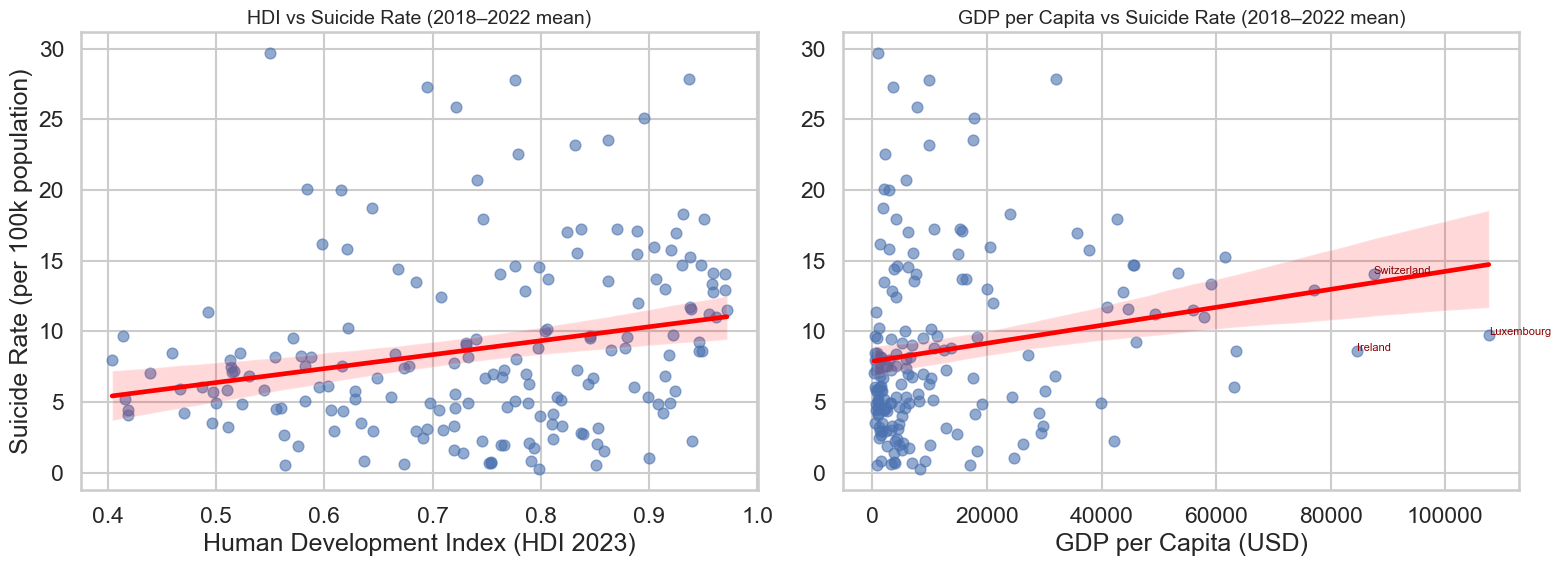

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot 1: HDI vs Suicide Rate
sns.regplot(
    x='HDI_2023', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[0]
)
axes[0].set_title('HDI vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[0].set_xlabel('Human Development Index (HDI 2023)')
axes[0].set_ylabel('Suicide Rate (per 100k population)')
print("Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)")

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[1]
)
axes[1].set_title('GDP per Capita vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[1].set_xlabel('GDP per Capita (USD)')
axes[1].set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier")

# Identifikasi outlier GDP tinggi
outliers = df_merge_mean[df_merge_mean['GDP_per_capita'] > 80000]

for _, row in outliers.iterrows():
    plt.text(row['GDP_per_capita'], row['Suicide_rate'], row['Country Name'],
             fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga


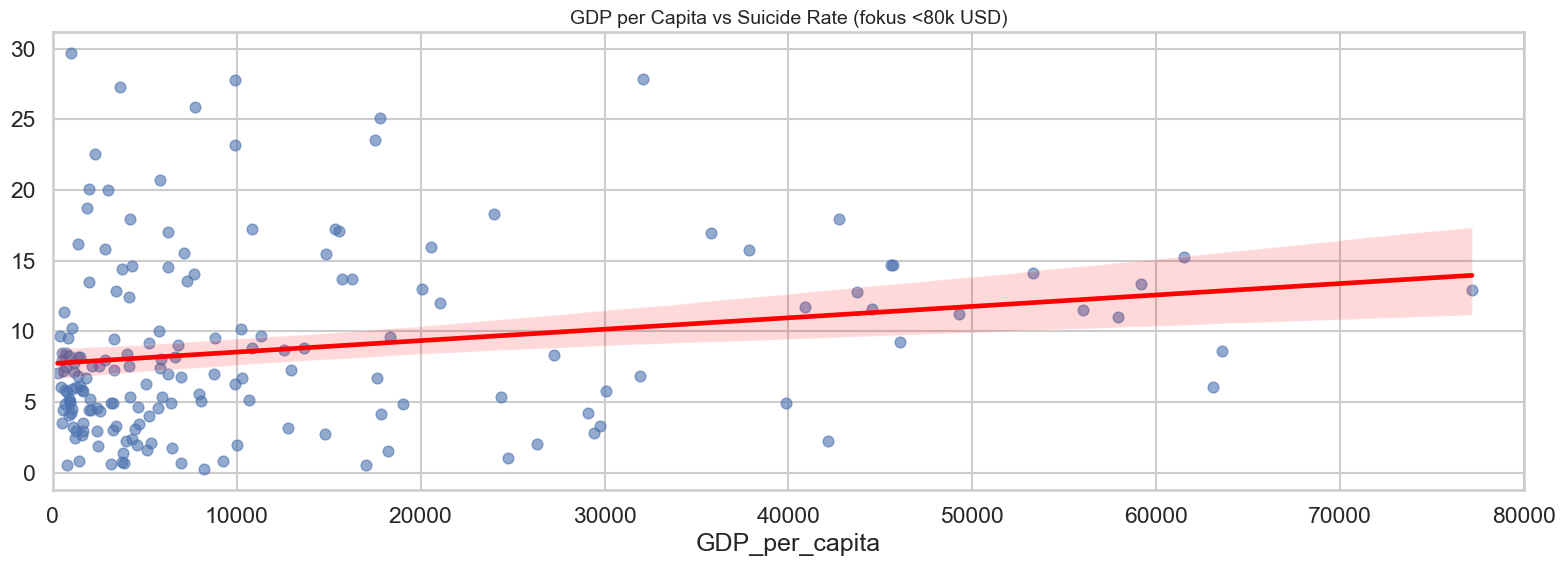

In [24]:
# buat sampe 80000-an aja si-x nya, biar motong outliernya

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, figsize=(16, 6))

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean[df_merge_mean['GDP_per_capita'] < 80000],
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes
)
axes.set_xlim(0, 80000)
axes.set_title('GDP per Capita vs Suicide Rate (fokus <80k USD)', fontsize=14)
axes.set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga")

plt.tight_layout()
plt.show()

In [25]:
# ✅ FIXED Cell 11 - Interpolation per-country in small gaps (linear), limit=2 years, both directions
interp_cols = primary_vars + ['Gini', 'Urban_pct', 'Unemployment_pct']

for col in interp_cols:
    if col in merged_clean.columns:
        merged_clean[col] = (
            merged_clean
            .groupby('Country Name')[col]
            .transform(lambda s: s.interpolate(method='linear', limit=2, limit_direction='both'))
        )

print("✅ Interpolation completed successfully.")


✅ Interpolation completed successfully.


In [26]:
merged_clean.head()

,Country Name,Year,GDP_per_capita,GDP_per_capita_current,Gini,Suicide_rate,Unemployment_pct,Urban_pct,HDI,HDI_sq,HDI_lag1,GDP_per_capita_lag1,Suicide_rate_lag1,income_group_auto,coverage_count,coverage_frac,ISO3,continent
0,Afghanistan,1990,NaN,NaN,NaN,NaN,8.070,21.177,0.496,0.246016,NaN,NaN,NaN,High,1,0.333333,AFG,Asia
1,Afghanistan,1991,NaN,NaN,NaN,NaN,8.070,21.266,0.496,0.246016,0.496,NaN,NaN,High,1,0.333333,AFG,Asia
2,Afghanistan,1992,NaN,NaN,NaN,NaN,8.011,21.355,0.496,0.246016,0.496,NaN,NaN,High,1,0.333333,AFG,Asia
3,Afghanistan,1993,NaN,NaN,NaN,NaN,7.888,21.444,0.496,0.246016,0.496,NaN,NaN,High,1,0.333333,AFG,Asia
4,Afghanistan,1994,NaN,NaN,NaN,NaN,7.822,21.534,0.496,0.246016,0.496,NaN,NaN,High,1,0.333333,AFG,Asia


In [27]:
# Cell 12 - Final numeric cleanup & save cleaned panel
# Ensure numeric
for col in merged_clean.columns:
    if merged_clean[col].dtype == object and col not in ['Country Name', 'Year', 'income_group_auto', 'continent', 'ISO3']:
        try:
            merged_clean[col] = pd.to_numeric(merged_clean[col], errors='coerce')
        except Exception:
            pass

# Save
merged_clean.to_csv(OUT_CLEAN, index=False)
print("Saved cleaned panel to:", OUT_CLEAN)


Saved cleaned panel to: ./Output/merged_clean_panel.csv


In [28]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1️⃣ LOAD & BERSIHKAN HDI
# ================================
df_hdi = pd.read_excel("./External-Dataset/HDI.xlsx")
# df_hdi = pd.read_excel("HDI.xlsx")

df_hdi.columns = df_hdi.columns.str.strip()
df_hdi = df_hdi[['Country', 'Human Development Index (HDI)']]
df_hdi = df_hdi.rename(columns={
    'Country': 'Country Name',
    'Human Development Index (HDI)': 'HDI_2023'
})
df_hdi['Country Name'] = df_hdi['Country Name'].str.strip()

# ================================
# 2️⃣ LOAD & SAMAKAN NAMA NEGARA
# ================================
df = pd.read_csv("./Dataset/WDICSV-rev.csv")
# df = pd.read_csv("WDICSV-rev.csv")

rename_map = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Congo': 'Congo, Rep.',
    'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Egypt': 'Egypt, Arab Rep.',
    'Eswatini (Kingdom of)': 'Eswatini',
    'Gambia': 'Gambia, The',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    "Korea (Democratic People's Rep. of)": 'Korea, Dem. People’s Rep.',
    'Korea (Republic of)': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    "Lao People's Democratic Republic": 'Lao PDR',
    'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.',
    'Moldova (Republic of)': 'Moldova',
    'Palestine, State of': 'West Bank and Gaza',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Korea, Dem. People’s Rep.': "Korea, Dem. People's Rep.",
    'Slovakia': 'Slovak Republic',
    'Tanzania (United Republic of)': 'Tanzania',
    'Türkiye': 'Turkiye',
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Yemen': 'Yemen, Rep.'
}
df_hdi['Country Name'] = df_hdi['Country Name'].replace(rename_map)

# ================================
# 3️⃣ PILIH INDIKATOR & HITUNG RATA-RATA 5 TAHUN
# ================================
indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}
years = ['2018', '2019', '2020', '2021', '2022']

df_sel = df[df["Indicator Code"].isin(indicators.keys())].copy()

# Hitung mean dan coverage (berapa persen tahun yang punya data)
df_sel["mean_5yr"] = df_sel[years].mean(axis=1, skipna=True)
df_sel["data_coverage"] = df_sel[years].notna().sum(axis=1) / len(years)

df_mean = df_sel[["Country Name", "Indicator Code", "mean_5yr", "data_coverage"]].drop_duplicates()

df_pivot = df_mean.pivot(index="Country Name", columns="Indicator Code", values="mean_5yr").reset_index()
df_pivot = df_pivot.rename(columns=indicators)

df_coverage = df_mean.pivot(index="Country Name", columns="Indicator Code", values="data_coverage").reset_index()
df_coverage = df_coverage.rename(columns={code: indicators[code] + "_coverage" for code in indicators})

# ================================
# 4️⃣ GABUNGKAN SEMUA DATA
# ================================
df_merge_mean = (
    df_pivot
    .merge(df_hdi, on="Country Name", how="left")
    .merge(df_coverage, on="Country Name", how="left")
)

# Interpolasi nilai yang hilang untuk inklusivitas
df_merge_mean[['GDP_per_capita', 'Suicide_rate', 'HDI_2023']] = df_merge_mean[
    ['GDP_per_capita', 'Suicide_rate', 'HDI_2023']
].interpolate(method='linear', limit_direction='both')

# Tambahkan flag etis: data reliability
df_merge_mean["Low_data_quality_flag"] = np.where(
    (df_merge_mean["GDP_per_capita_coverage"] < 0.6) |
    (df_merge_mean["Suicide_rate_coverage"] < 0.6),
    "⚠️ Low data reliability",
    "✅ Sufficient data"
)

print("\n✅ Data akhir siap dipakai secara etis & transparan:")
print(df_merge_mean.head())

# ================================
# 5️⃣ ANALISIS KORELASI
# ================================
for col in ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']:
    df_merge_mean[col] = pd.to_numeric(df_merge_mean[col], errors='coerce')

# Hapus baris yang punya NaN atau inf di kolom penting
df_corr = df_merge_mean.replace([np.inf, -np.inf], np.nan).dropna(
    subset=['HDI_2023', 'GDP_per_capita', 'Suicide_rate']
)

# Sekarang aman untuk pearson
corr_matrix = df_corr[['HDI_2023', 'GDP_per_capita', 'Suicide_rate']].corr(method='pearson')

r_hdi_suicide, p_hdi_suicide = pearsonr(df_corr['HDI_2023'], df_corr['Suicide_rate'])
r_gdp_suicide, p_gdp_suicide = pearsonr(df_corr['GDP_per_capita'], df_corr['Suicide_rate'])

print("\n📊 Korelasi Matrix:")
print(corr_matrix.round(3))
print(f"\nHDI ↔ Suicide Rate: r = {r_hdi_suicide:.3f}, p = {p_hdi_suicide:.4f}")
print(f"GDP ↔ Suicide Rate: r = {r_gdp_suicide:.3f}, p = {p_gdp_suicide:.4f}")

# Catatan kecil tambahan (opsional)
print(f"\nJumlah negara valid dalam analisis korelasi: {len(df_corr)}")

# ================================
# 6️⃣ CATATAN ETIS
# ================================
print("\n📘 Catatan Etis:")
print("Kami tidak menghapus seluruh observasi dengan data hilang.")
print("Sebaliknya, kami melakukan interpolasi dan memberi penanda 'Low data reliability'")
print("untuk negara dengan cakupan data <60%, agar analisis tetap inklusif sesuai prinsip ASA 2.2.")


✅ Data akhir siap dipakai secara etis & transparan:
                  Country Name  GDP_per_capita  Suicide_rate HDI_2023  \
0                  Afghanistan      485.022544      3.545000    0.496   
1  Africa Eastern and Southern     1429.887639      8.082190      NaN   
2   Africa Western and Central     1806.725660      5.590313      NaN   
3                      Albania     4702.593151      3.430000     0.81   
4                      Algeria     4550.913354      2.002500    0.763   

   GDP_per_capita_coverage  Suicide_rate_coverage Low_data_quality_flag  
0                      1.0                    0.8     ✅ Sufficient data  
1                      1.0                    0.8     ✅ Sufficient data  
2                      1.0                    0.8     ✅ Sufficient data  
3                      1.0                    0.8     ✅ Sufficient data  
4                      1.0                    0.8     ✅ Sufficient data  

📊 Korelasi Matrix:
                HDI_2023  GDP_per_capita  Su

In [29]:
# Cell 12 - Final numeric cleanup & save cleaned panel
# Ensure numeric
for col in df_merge_mean.columns:
    if df_merge_mean[col].dtype == object and col not in ['Country Name', 'Year', 'income_group_auto', 'continent', 'ISO3']:
        try:
            df_merge_mean[col] = pd.to_numeric(df_merge_mean[col], errors='coerce')
        except Exception:
            pass

# Save
df_merge_mean.to_csv(OUT_CLEAN, index=False)
print("Saved cleaned panel to:", OUT_CLEAN)


Saved cleaned panel to: ./Output/merged_clean_panel.csv


### Data terakhir dari nad

In [30]:
df_merge_mean

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023,GDP_per_capita_coverage,Suicide_rate_coverage,Low_data_quality_flag
0,Afghanistan,485.022544,3.545000,0.496,1.0,0.8,NaN
1,Africa Eastern and Southern,1429.887639,8.082190,NaN,1.0,0.8,NaN
2,Africa Western and Central,1806.725660,5.590313,NaN,1.0,0.8,NaN
3,Albania,4702.593151,3.430000,0.810,1.0,0.8,NaN
4,Algeria,4550.913354,2.002500,0.763,1.0,0.8,NaN
...,...,...,...,...,...,...,...
261,West Bank and Gaza,3174.028802,0.657500,0.674,1.0,0.8,NaN
262,World,10989.372230,9.286507,NaN,1.0,0.8,NaN
263,"Yemen, Rep.",983.981958,4.262500,0.470,1.0,0.8,NaN
264,Zambia,1283.824611,6.102500,0.595,1.0,0.8,NaN


In [31]:
# --- START: FEATURE ENGINEERING, REGION MAPPING, INTERPOLATION, SAVE ---
import country_converter as coco
import os

# output path
OUT_CLEAN = "./Output/merged_clean_panel.csv"
os.makedirs(os.path.dirname(OUT_CLEAN), exist_ok=True)

# 0) copy working dataframe so original df_merge_mean tetap utuh
merged = df_merge_mean.copy()

# Primary variables we care about
primary_vars = ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']

# 1) convert numeric and ensure finite
for col in primary_vars:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors='coerce')
merged = merged.replace([np.inf, -np.inf], np.nan)

# 2) Feature engineering
# 2a) HDI squared (nonlinear test)
if 'HDI_2023' in merged.columns:
    merged['HDI_sq'] = merged['HDI_2023'] ** 2

# 2b) log GDP per capita (safe: add small constant)
if 'GDP_per_capita' in merged.columns:
    merged['log_GDP_per_capita'] = np.log(merged['GDP_per_capita'].where(merged['GDP_per_capita'] > 0, np.nan))

# 2c) simple lag (if you have year dimension; here we don't have panel years except 5yr mean — 
# but keep generic approach if dataset is multi-year; this will produce NaN if Year missing)
if 'Year' in merged.columns:
    merged = merged.sort_values(['Country Name', 'Year'])
    for col in ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']:
        if col in merged.columns:
            merged[f'{col}_lag1'] = merged.groupby('Country Name')[col].shift(1)
else:
    # if only cross-sectional (one row per country), create NaN lag columns for consistency
    for col in ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']:
        merged[f'{col}_lag1'] = np.nan

# 2d) income_group_auto by GDP_per_capita quantiles (cross-sectional)
if 'GDP_per_capita' in merged.columns:
    # use rank method to avoid errors when many ties or NaN
    try:
        merged['income_group_auto'] = pd.qcut(merged['GDP_per_capita'].rank(method='first', na_option='bottom'),
                                              q=4,
                                              labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
    except Exception:
        # fallback: bin by simple cut
        merged['income_group_auto'] = pd.cut(merged['GDP_per_capita'],
                                             bins=[-np.inf, 2000, 8000, 30000, np.inf],
                                             labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
else:
    merged['income_group_auto'] = np.nan

# 3) Region / ISO3 mapping (fast & robust)
cc = coco.CountryConverter()
unique_countries = merged['Country Name'].dropna().unique()

def safe_convert(name, to='ISO3'):
    try:
        res = cc.convert(names=name, to=to)
    except Exception:
        return np.nan
    # cc.convert sometimes returns "not found" string
    if isinstance(res, str) and res.strip().lower() in ('not found', '', 'nan'):
        return np.nan
    # if array-like or list, pick first element that is meaningful
    if isinstance(res, (list, tuple, np.ndarray)):
        for r in res:
            if isinstance(r, str) and r.strip().lower() not in ('not found', '', 'nan'):
                return r
        return np.nan
    return res

iso_map = {}
cont_map = {}
for name in unique_countries:
    iso_map[name] = safe_convert(name, to='ISO3')
    cont_map[name] = safe_convert(name, to='continent')

merged['ISO3'] = merged['Country Name'].map(iso_map)
merged['continent'] = merged['Country Name'].map(cont_map)
# fix some known names manually (tambahkan jika masih ada yang bermasalah)
manual_iso_fixes = {
    'Bahamas, The': 'BHS',
    'Congo, Dem. Rep.': 'COD',
    'Congo, Rep.': 'COG',
    'Korea, Rep.': 'KOR',
    "Korea, Dem. People's Rep.": 'PRK',
    'Eswatini': 'SWZ',
    'West Bank and Gaza': 'PSE',
    'Venezuela, RB': 'VEN'
}
for k, v in manual_iso_fixes.items():
    merged.loc[merged['Country Name'] == k, 'ISO3'] = v
    # update continent from ISO if possible
    try:
        merged.loc[merged['Country Name'] == k, 'continent'] = safe_convert(v, to='continent')
    except Exception:
        pass

merged['continent'] = merged['continent'].replace('not found', np.nan)

# 4) Coverage checks and drop countries with very low coverage
# compute per-country coverage fraction for primary variables (if multi-year: average over years)
if 'Year' in merged.columns:
    country_summary = merged.groupby('Country Name')[primary_vars].apply(lambda d: d.notna().mean()).reset_index()
else:
    # cross-sectional: coverage is simply non-null indicator (1/0) => mean is 1 or 0
    country_summary = merged.groupby('Country Name')[primary_vars].apply(lambda d: d.notna().mean()).reset_index()

# drop countries that have < 0.6 availability in ANY primary var
drop_mask = (country_summary[primary_vars] < 0.6).any(axis=1)
countries_to_drop = country_summary.loc[drop_mask, 'Country Name'].tolist()
print(f"Countries to drop due to low coverage (<60% in any primary var): {len(countries_to_drop)}")
merged_clean = merged[~merged['Country Name'].isin(countries_to_drop)].copy()
print("Countries remaining after drop:", merged_clean['Country Name'].nunique())

# 5) Interpolate per-country for small gaps using transform (safe)
interp_cols = [c for c in (primary_vars + ['Gini', 'Urban_pct', 'Unemployment_pct']) if c in merged_clean.columns]

for col in interp_cols:
    merged_clean[col] = (
        merged_clean
        .groupby('Country Name')[col]
        .transform(lambda s: s.interpolate(method='linear', limit=2, limit_direction='both'))
    )

# 6) Final numeric cleanup: coerce leftover objects to numeric (except categorical cols)
for col in merged_clean.columns:
    if merged_clean[col].dtype == object and col not in ['Country Name', 'Year', 'income_group_auto', 'continent', 'ISO3']:
        merged_clean[col] = pd.to_numeric(merged_clean[col], errors='coerce')

# 7) Recompute final coverage flags
merged_clean['coverage_frac'] = merged_clean[primary_vars].notna().mean(axis=1)
merged_clean["Low_data_quality_flag"] = np.where(
    (merged_clean.get("GDP_per_capita_coverage", 1) < 0.6) |
    (merged_clean.get("Suicide_rate_coverage", 1) < 0.6),
    "⚠️ Low data reliability",
    "✅ Sufficient data"
)

# 8) Save cleaned dataset
merged_clean.to_csv(OUT_CLEAN, index=False)
print("Saved cleaned dataset to:", OUT_CLEAN)
print("Final cleaned shape:", merged_clean.shape)
# --- END ---


Africa Eastern and Southern not found in regex
Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
Euro area not found in regex
Euro area not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not

Countries to drop due to low coverage (<60% in any primary var): 73
Countries remaining after drop: 193
Saved cleaned dataset to: ./Output/merged_clean_panel.csv
Final cleaned shape: (193, 16)


In [32]:
# Cell 12 - Final numeric cleanup & save cleaned panel
# Ensure numeric
for col in df_merge_mean.columns:
    if df_merge_mean[col].dtype == object and col not in ['Country Name', 'Year', 'income_group_auto', 'continent', 'ISO3']:
        try:
            df_merge_mean[col] = pd.to_numeric(df_merge_mean[col], errors='coerce')
        except Exception:
            pass

# Save
df_merge_mean.to_csv(OUT_CLEAN2, index=False)
print("Saved cleaned panel to:", OUT_CLEAN2)


Saved cleaned panel to: ./Output/merged_clean_panel2.csv


## Output Clean CSV After Preprocessing

Ada 2 file:
1. merged_clean_panel.csv -> Cleaning and Preprocessing dari Stanley udah di FE jugaa
2. merged_clean_panel2.csv -> Cleaning and Preprocessing dari Nad aku download-in ke csv baru

In [33]:
df_stanley = pd.read_csv("./Output/merged_clean_panel.csv")
df_stanley

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023,GDP_per_capita_coverage,Suicide_rate_coverage,Low_data_quality_flag,HDI_sq,log_GDP_per_capita,HDI_2023_lag1,GDP_per_capita_lag1,Suicide_rate_lag1,income_group_auto,ISO3,continent,coverage_frac
0,Afghanistan,485.022544,3.545000,0.496,1.0,0.8,✅ Sufficient data,0.246016,6.184195,NaN,NaN,NaN,Low,AFG,Asia,1.0
1,Albania,4702.593151,3.430000,0.810,1.0,0.8,✅ Sufficient data,0.656100,8.455869,NaN,NaN,NaN,Lower-Middle,ALB,Europe,1.0
2,Algeria,4550.913354,2.002500,0.763,1.0,0.8,✅ Sufficient data,0.582169,8.423083,NaN,NaN,NaN,Lower-Middle,DZA,Africa,1.0
3,Andorra,37966.897123,5.699167,0.913,1.0,0.0,⚠️ Low data reliability,0.833569,10.544470,NaN,NaN,NaN,High,AND,Europe,1.0
4,Angola,2528.206553,7.547500,0.616,1.0,0.8,✅ Sufficient data,0.379456,7.835265,NaN,NaN,NaN,Lower-Middle,AGO,Africa,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Viet Nam,3313.681945,7.282500,0.766,1.0,0.8,✅ Sufficient data,0.586756,8.105815,NaN,NaN,NaN,Lower-Middle,VNM,Asia,1.0
189,West Bank and Gaza,3174.028802,0.657500,0.674,1.0,0.8,✅ Sufficient data,0.454276,8.062757,NaN,NaN,NaN,Lower-Middle,PSE,Asia,1.0
190,"Yemen, Rep.",983.981958,4.262500,0.470,1.0,0.8,✅ Sufficient data,0.220900,6.891608,NaN,NaN,NaN,Low,YEM,Asia,1.0
191,Zambia,1283.824611,6.102500,0.595,1.0,0.8,✅ Sufficient data,0.354025,7.157599,NaN,NaN,NaN,Low,ZMB,Africa,1.0


In [34]:
df_nad = pd.read_csv("./Output/merged_clean_panel2.csv")
df_nad

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023,GDP_per_capita_coverage,Suicide_rate_coverage,Low_data_quality_flag
0,Afghanistan,485.022544,3.545000,0.496,1.0,0.8,NaN
1,Africa Eastern and Southern,1429.887639,8.082190,NaN,1.0,0.8,NaN
2,Africa Western and Central,1806.725660,5.590313,NaN,1.0,0.8,NaN
3,Albania,4702.593151,3.430000,0.810,1.0,0.8,NaN
4,Algeria,4550.913354,2.002500,0.763,1.0,0.8,NaN
...,...,...,...,...,...,...,...
261,West Bank and Gaza,3174.028802,0.657500,0.674,1.0,0.8,NaN
262,World,10989.372230,9.286507,NaN,1.0,0.8,NaN
263,"Yemen, Rep.",983.981958,4.262500,0.470,1.0,0.8,NaN
264,Zambia,1283.824611,6.102500,0.595,1.0,0.8,NaN


## EDA

In [35]:
# Cell 13 - Quick descriptive summary & correlation on complete cases
# Summary stats for primary vars
print("Descriptive stats (primary vars):")
display(merged_clean[primary_vars].describe().round(3))

# Correlation matrix on rows without NaN among primary vars
df_corr = merged_clean.dropna(subset=primary_vars)[primary_vars]
print("N observations used for correlation:", len(df_corr))
corr_mat = df_corr.corr(method='pearson')
print(corr_mat.round(3))

# Pearson r (safe run with dropna)
if len(df_corr) >= 3:
    r_hdi_suicide, p_hdi_suicide = pearsonr(df_corr['HDI'], df_corr['Suicide_rate'])
    print(f"\nHDI <-> Suicide_rate: r={r_hdi_suicide:.3f}, p={p_hdi_suicide:.4f}, n={len(df_corr)}")
else:
    print("Not enough observations for Pearson r.")


Descriptive stats (primary vars):


,HDI_2023,GDP_per_capita,Suicide_rate
count,193.000,193.000,193.000
mean,0.741,13768.357,8.717
std,0.152,18681.653,6.086
min,0.388,258.422,0.262
25%,0.622,1996.492,4.465
50%,0.762,5851.948,7.252
75%,0.862,17011.981,12.022
max,0.972,107599.576,29.672


N observations used for correlation: 193
                HDI_2023  GDP_per_capita  Suicide_rate
HDI_2023           1.000           0.690         0.228
GDP_per_capita     0.690           1.000         0.186
Suicide_rate       0.228           0.186         1.000


KeyError: 'HDI'

In [ ]:
# Cell 14 - Basic EDA plots (scatter + smoothing per continent)
import matplotlib.pyplot as plt
import seaborn as sns

# scatter HDI vs Suicide colored by continent (use only non-null rows)
plot_df = merged_clean.dropna(subset=['HDI', 'Suicide_rate'])
plt.figure(figsize=(9,6))
sns.scatterplot(data=plot_df, x='HDI', y='Suicide_rate', hue='continent', alpha=0.7)
sns.regplot(data=plot_df, x='HDI', y='Suicide_rate', scatter=False, lowess=True, ci=95)
plt.title("HDI vs Suicide rate (panel datapoints)")
plt.xlabel("HDI")
plt.ylabel("Suicide rate (per 100k)")
plt.legend(title='Continent', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


KeyError: ['HDI']

In [ ]:
# Cell 15 - Example: Fit a simple quadratic OLS on pooled cross-section (use statsmodels)
import statsmodels.formula.api as smf

# keep rows with required fields only
model_df = merged_clean.dropna(subset=['HDI', 'HDI_sq', 'Suicide_rate', 'GDP_per_capita'])
# pooled OLS (not FE)
formula = "Suicide_rate ~ HDI + HDI_sq + np.log(GDP_per_capita + 1) + Gini + Urban_pct"
# drop columns possibly not present -> adjust formula
for var in ['Gini', 'Urban_pct']:
    if var not in model_df.columns:
        formula = formula.replace(" + " + var, "")

print("Running formula:", formula)
pooled = smf.ols(formula=formula, data=model_df).fit(cov_type='HC1')  # robust SE
print(pooled.summary().tables[1])
# compute tipping point if quadratic present
if 'HDI_sq' in pooled.params.index and 'HDI' in pooled.params.index:
    b1 = pooled.params['HDI']
    b2 = pooled.params['HDI_sq']
    if b2 != 0:
        tipping = -b1 / (2 * b2)
        print(f"Tipping point HDI* = {tipping:.3f}")


Running formula: Suicide_rate ~ HDI + HDI_sq + np.log(GDP_per_capita + 1) + Gini + Urban_pct
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     27.7639      5.637      4.925      0.000      16.716      38.812
HDI                            3.6673     13.908      0.264      0.792     -23.592      30.927
HDI_sq                        24.7602     11.556      2.143      0.032       2.110      47.410
np.log(GDP_per_capita + 1)    -2.9983      0.549     -5.463      0.000      -4.074      -1.923
Gini                          -0.2724      0.030     -9.117      0.000      -0.331      -0.214
Urban_pct                      0.0195      0.016      1.234      0.217      -0.011       0.050
Tipping point HDI* = -0.074


In [ ]:
# Cell 16 - Save model results & messages for storytelling
# Save summary outputs to text
with open("./Output/model_summary.txt", "w", encoding="utf-8") as f:
    f.write(pooled.summary().as_text())
print("Saved model summary to ./Output/model_summary.txt")


Saved model summary to ./Output/model_summary.txt


In [ ]:
df_merge_mean.head()

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023,GDP_per_capita_coverage,Suicide_rate_coverage,Low_data_quality_flag
0,Afghanistan,485.022544,3.545000,0.496,1.0,0.8,NaN
1,Africa Eastern and Southern,1429.887639,8.082190,NaN,1.0,0.8,NaN
2,Africa Western and Central,1806.725660,5.590313,NaN,1.0,0.8,NaN
3,Albania,4702.593151,3.430000,0.810,1.0,0.8,NaN
4,Algeria,4550.913354,2.002500,0.763,1.0,0.8,NaN


## EDA - 2

Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)
Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier


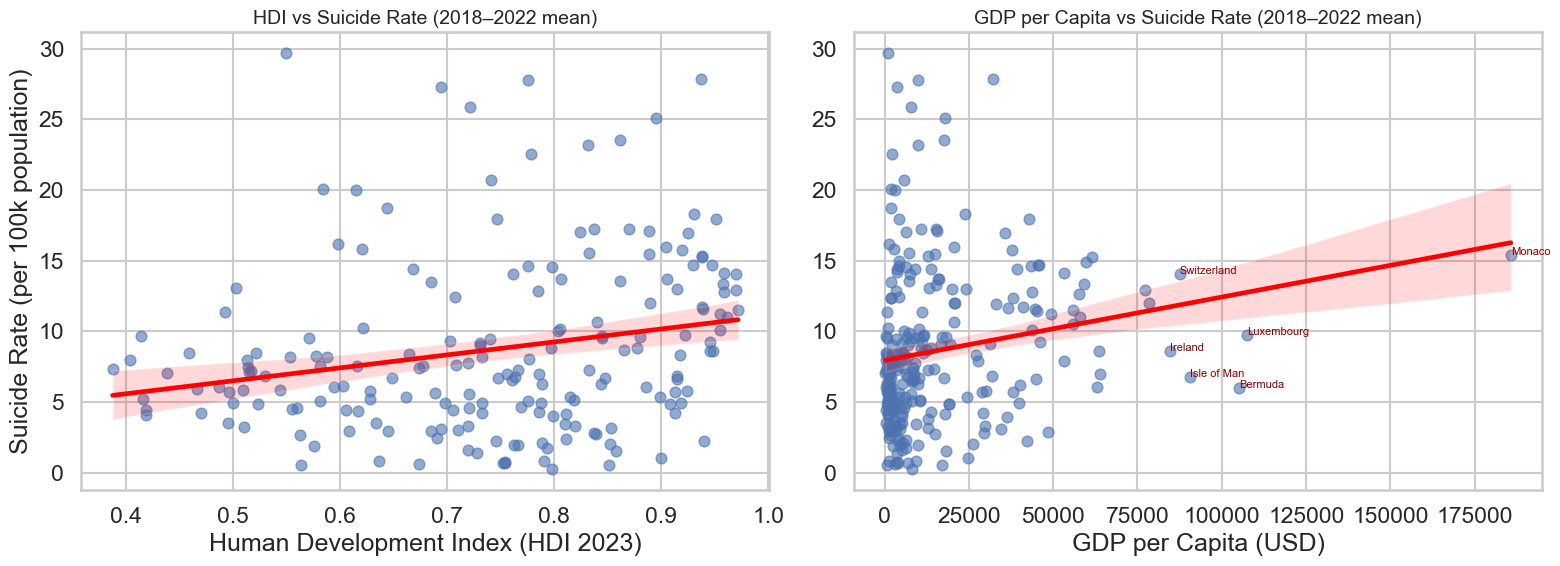

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot 1: HDI vs Suicide Rate
sns.regplot(
    x='HDI_2023', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[0]
)
axes[0].set_title('HDI vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[0].set_xlabel('Human Development Index (HDI 2023)')
axes[0].set_ylabel('Suicide Rate (per 100k population)')
print("Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)")

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[1]
)
axes[1].set_title('GDP per Capita vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[1].set_xlabel('GDP per Capita (USD)')
axes[1].set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier")

# Identifikasi outlier GDP tinggi
outliers = df_merge_mean[df_merge_mean['GDP_per_capita'] > 80000]

for _, row in outliers.iterrows():
    plt.text(row['GDP_per_capita'], row['Suicide_rate'], row['Country Name'],
             fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga


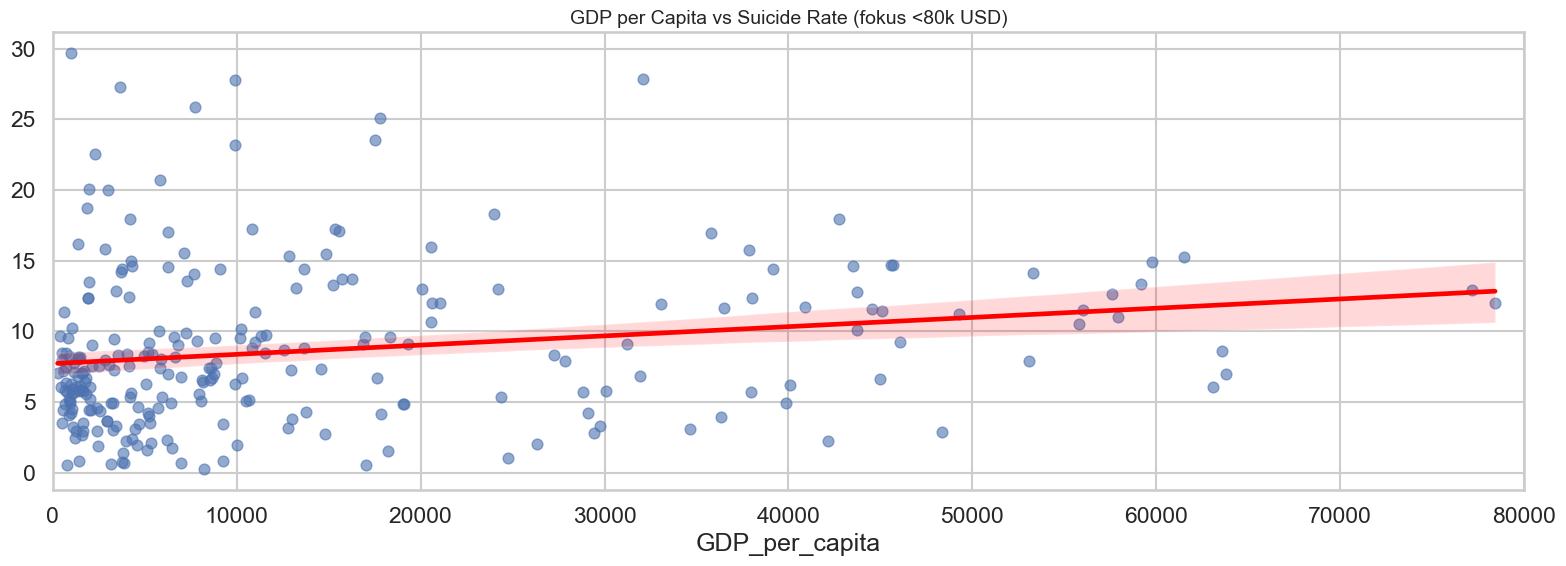

In [ ]:
# buat sampe 80000-an aja si-x nya, biar motong outliernya

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, figsize=(16, 6))

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean[df_merge_mean['GDP_per_capita'] < 80000],
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes
)
axes.set_xlim(0, 80000)
axes.set_title('GDP per Capita vs Suicide Rate (fokus <80k USD)', fontsize=14)
axes.set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga")

plt.tight_layout()
plt.show()

## Time Series Dataset in 2000s

Lihat apakah pertumbuhan ekonomi (GDP per capita) di suatu negara berjalan seiring atau berlawanan dengan tren bunuh diri.

In [ ]:
# Cara 2 -> Ini versi cleaning yang lebih etis dibanding di atas ya

indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}

years = [str(y) for y in range(2000, 2024)]

df_long = df[df["Indicator Code"].isin(indicators.keys())][["Country Name", "Indicator Code"] + years]

# Ubah ke format long
df_melt = df_long.melt(id_vars=["Country Name", "Indicator Code"],
                       var_name="Year", value_name="Value")

# Pivot ke wide format
df_pivot = df_melt.pivot_table(index=["Country Name", "Year"],
                               columns="Indicator Code",
                               values="Value").reset_index()
df_pivot = df_pivot.rename(columns=indicators)
df_pivot["Year"] = df_pivot["Year"].astype(int)

# ======================================
# 🌱 Bagian Etis & Inklusif
# ======================================

# 1️⃣ Hitung proporsi data yang tersedia per negara
coverage = df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]].apply(
    lambda x: x.notna().mean()
).reset_index()
coverage.columns = ["Country Name", "GDP_per_capita_coverage", "Suicide_rate_coverage"]

# 2️⃣ Interpolasi data hilang antar tahun (jaga kontinuitas, tidak manipulatif)
df_pivot = df_pivot.sort_values(["Country Name", "Year"])
df_pivot[["GDP_per_capita", "Suicide_rate"]] = (
    df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]]
    .apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
    .reset_index(drop=True)
)

# 3️⃣ Tambahkan flag reliabilitas berdasarkan coverage historis
df_pivot = df_pivot.merge(coverage, on="Country Name", how="left")
df_pivot["Data_quality_flag"] = np.where(
    (df_pivot["GDP_per_capita_coverage"] < 0.6) |
    (df_pivot["Suicide_rate_coverage"] < 0.6),
    "⚠️ Low data reliability",
    "✅ Sufficient data"
)


# 4️⃣ Dokumentasi etis
print("\n📘 Catatan Etis:")
print("- Tidak semua negara memiliki data lengkap antara 2000–2023.")
print("- Missing values diinterpolasi agar tren tetap terwakili.")
print("- Negara dengan <60% data valid ditandai sebagai 'Low data reliability'.")
print("- Pendekatan ini menjaga keadilan statistik dan menghindari bias terhadap negara berkembang.")

df_pivot.head()


📘 Catatan Etis:
- Tidak semua negara memiliki data lengkap antara 2000–2023.
- Missing values diinterpolasi agar tren tetap terwakili.
- Negara dengan <60% data valid ditandai sebagai 'Low data reliability'.
- Pendekatan ini menjaga keadilan statistik dan menghindari bias terhadap negara berkembang.


,Country Name,Year,GDP_per_capita,Suicide_rate,GDP_per_capita_coverage,Suicide_rate_coverage,Data_quality_flag
0,Afghanistan,2000,308.318270,4.36,1.0,0.916667,✅ Sufficient data
1,Afghanistan,2001,277.118051,4.38,1.0,0.916667,✅ Sufficient data
2,Afghanistan,2002,338.139974,4.26,1.0,0.916667,✅ Sufficient data
3,Afghanistan,2003,346.071627,4.24,1.0,0.916667,✅ Sufficient data
4,Afghanistan,2004,338.637274,4.23,1.0,0.916667,✅ Sufficient data


In [ ]:
# Ini versi lebih transparan dari yang atas ya

# === 1️⃣ Siapkan data dasar ===
df = pd.read_csv("./Dataset/WDICSV-rev.csv")
# df = pd.read_csv("WDICSV-rev.csv")

indicators = ['NY.GDP.PCAP.KD', 'SH.STA.SUIC.P5']
df_long = df[df["Indicator Code"].isin(indicators)]

years = [str(y) for y in range(2000, 2024)]
df_long = df_long.melt(
    id_vars=["Country Name", "Indicator Code"],
    value_vars=years,
    var_name="Year",
    value_name="Value"
)
df_long["Year"] = df_long["Year"].astype(int)
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

# === 2️⃣ Pivot ke wide format ===
df_pivot = df_long.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Code",
    values="Value"
).reset_index()

df_pivot = df_pivot.rename(columns={
    'NY.GDP.PCAP.KD': 'GDP_per_capita',
    'SH.STA.SUIC.P5': 'Suicide_rate'
})

# === 3️⃣ Interpolasi untuk keadilan data (jangan drop negara berkembang) ===
df_pivot = df_pivot.sort_values(["Country Name", "Year"])
df_pivot[["GDP_per_capita", "Suicide_rate"]] = (
    df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]]
    .apply(lambda g: g.interpolate(method='linear', limit_direction='both'))
    .reset_index(drop=True)
)

# === 4️⃣ Hitung pertumbuhan & perubahan ===
df_pivot["GDP_growth"] = df_pivot.groupby("Country Name")["GDP_per_capita"].pct_change() * 100
df_pivot["Suicide_change"] = df_pivot.groupby("Country Name")["Suicide_rate"].pct_change() * 100

# Batasi outlier ekstrem agar tidak menyesatkan
df_pivot["GDP_growth"] = df_pivot["GDP_growth"].clip(-100, 100)
df_pivot["Suicide_change"] = df_pivot["Suicide_change"].clip(-100, 100)

# === 5️⃣ Hitung coverage data ===
coverage = df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]].apply(
    lambda x: x.notna().mean()
).reset_index()
coverage.columns = ["Country Name", "GDP_coverage", "Suicide_coverage"]

# === 6️⃣ Hitung resilience per negara ===
resilience_df = (
    df_pivot.groupby("Country Name")[["GDP_growth", "Suicide_change"]]
    .mean()
    .reset_index()
)

# === 7️⃣ Gabungkan dengan HDI dan coverage ===
resilience_df = (
    resilience_df
    .merge(df_hdi, on="Country Name", how="left")
    .merge(coverage, on="Country Name", how="left")
)

# === 8️⃣ Tambahkan flag reliabilitas ===
resilience_df["Data_quality_flag"] = np.where(
    (resilience_df["GDP_coverage"] < 0.6) | (resilience_df["Suicide_coverage"] < 0.6),
    "⚠️ Low data reliability",
    "✅ Reliable"
)

print("✅ Data Resilience dengan Pertimbangan Etis:")
print(resilience_df.head())

print("\n📘 Catatan Etis:")
print("- Missing data diinterpolasi agar tren tidak bias terhadap negara berkembang.")
print("- Negara dengan data coverage <60% ditandai sebagai 'Low data reliability'.")
print("- Pertumbuhan ekstrem dibatasi antara -100% s.d. +100% untuk mencegah outlier misleading.")

✅ Data Resilience dengan Pertimbangan Etis:
                  Country Name  GDP_growth  Suicide_change HDI_2023  \
0                  Afghanistan    1.295866       -0.811508    0.496   
1  Africa Eastern and Southern    0.742705        0.303258      NaN   
2   Africa Western and Central    1.961359        0.086982      NaN   
3                      Albania    4.506631       -1.423423     0.81   
4                      Algeria    1.212007       -2.545643    0.763   

   GDP_coverage  Suicide_coverage Data_quality_flag  
0           1.0               1.0        ✅ Reliable  
1           1.0               1.0        ✅ Reliable  
2           1.0               1.0        ✅ Reliable  
3           1.0               1.0        ✅ Reliable  
4           1.0               1.0        ✅ Reliable  

📘 Catatan Etis:
- Missing data diinterpolasi agar tren tidak bias terhadap negara berkembang.
- Negara dengan data coverage <60% ditandai sebagai 'Low data reliability'.
- Pertumbuhan ekstrem dibatasi ant

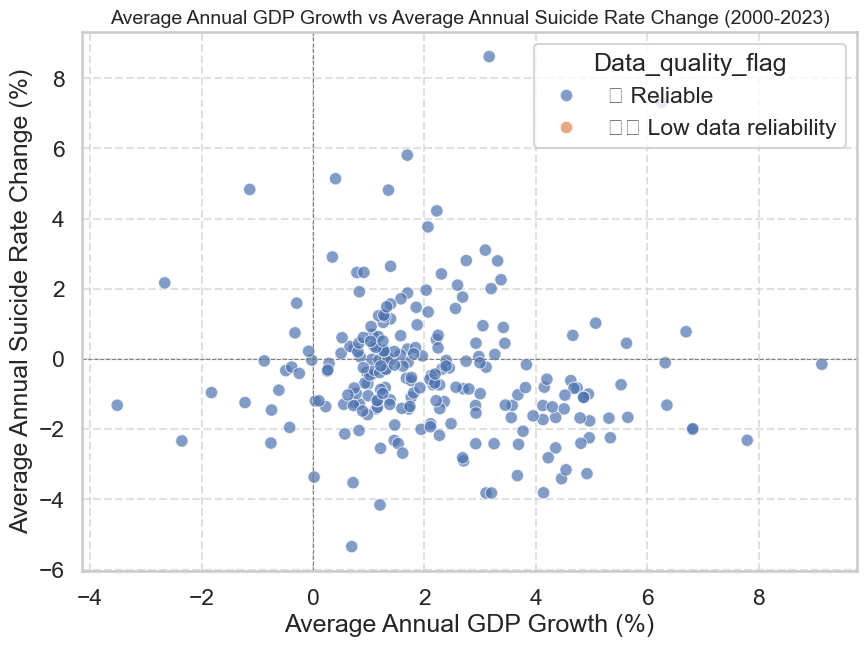


Interpretasi Scatter Plot:
- Titik di kuadran kiri atas: Negara dengan rata-rata pertumbuhan GDP negatif dan penurunan tingkat bunuh diri.
- Titik di kuadran kanan atas: Negara dengan rata-rata pertumbuhan GDP positif dan kenaikan tingkat bunuh diri.
- Titik di kuadran kiri bawah: Negara dengan rata-rata pertumbuhan GDP negatif dan kenaikan tingkat bunuh diri.
- Titik di kuadran kanan bawah: Negara dengan rata-rata pertumbuhan GDP positif dan penurunan tingkat bunuh diri.
- Warna titik menunjukkan reliabilitas data ('✅ Reliable' atau '⚠️ Low data reliability').


In [ ]:
# Scatter plot of average GDP growth vs average suicide rate change
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=resilience_df,
    x='GDP_growth',
    y='Suicide_change',
    hue='Data_quality_flag', # Color based on data quality
    alpha=0.7,
    s=80
)

plt.title('Average Annual GDP Growth vs Average Annual Suicide Rate Change (2000-2023)', fontsize=14)
plt.xlabel('Average Annual GDP Growth (%)')
plt.ylabel('Average Annual Suicide Rate Change (%)')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add horizontal line at 0 for Suicide Change
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8) # Add vertical line at 0 for GDP Growth
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nInterpretasi Scatter Plot:")
print("- Titik di kuadran kiri atas: Negara dengan rata-rata pertumbuhan GDP negatif dan penurunan tingkat bunuh diri.")
print("- Titik di kuadran kanan atas: Negara dengan rata-rata pertumbuhan GDP positif dan kenaikan tingkat bunuh diri.")
print("- Titik di kuadran kiri bawah: Negara dengan rata-rata pertumbuhan GDP negatif dan kenaikan tingkat bunuh diri.")
print("- Titik di kuadran kanan bawah: Negara dengan rata-rata pertumbuhan GDP positif dan penurunan tingkat bunuh diri.")
print("- Warna titik menunjukkan reliabilitas data ('✅ Reliable' atau '⚠️ Low data reliability').")

In [ ]:
# INI APA DE MKSDNYA KALAU COVERAGE NYA MASIH ADA YANG 0 ?
resilience_df['Suicide_coverage'].value_counts()

Suicide_coverage
1.0    233
0.0     29
Name: count, dtype: int64

In [ ]:
resilience_df['GDP_coverage'].value_counts()

GDP_coverage
1.0    260
0.0      2
Name: count, dtype: int64

In [ ]:
resilience_df['Data_quality_flag'].value_counts()

Data_quality_flag
✅ Reliable                 231
⚠️ Low data reliability     31
Name: count, dtype: int64

In [ ]:
df_merge_mean.head()

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023,GDP_per_capita_coverage,Suicide_rate_coverage,Low_data_quality_flag
0,Afghanistan,485.022544,3.545000,0.496,1.0,0.8,NaN
1,Africa Eastern and Southern,1429.887639,8.082190,NaN,1.0,0.8,NaN
2,Africa Western and Central,1806.725660,5.590313,NaN,1.0,0.8,NaN
3,Albania,4702.593151,3.430000,0.810,1.0,0.8,NaN
4,Algeria,4550.913354,2.002500,0.763,1.0,0.8,NaN


📈 Korelasi Matrix:


,HDI_2023,GDP_per_capita,Suicide_rate,GDP_per_capita_coverage,Suicide_rate_coverage
HDI_2023,1.000,0.690,0.228,0.102,-0.128
GDP_per_capita,0.690,1.000,0.186,0.022,-0.077
Suicide_rate,0.228,0.186,1.000,-0.051,0.033
GDP_per_capita_coverage,0.102,0.022,-0.051,1.000,0.130
Suicide_rate_coverage,-0.128,-0.077,0.033,0.130,1.000


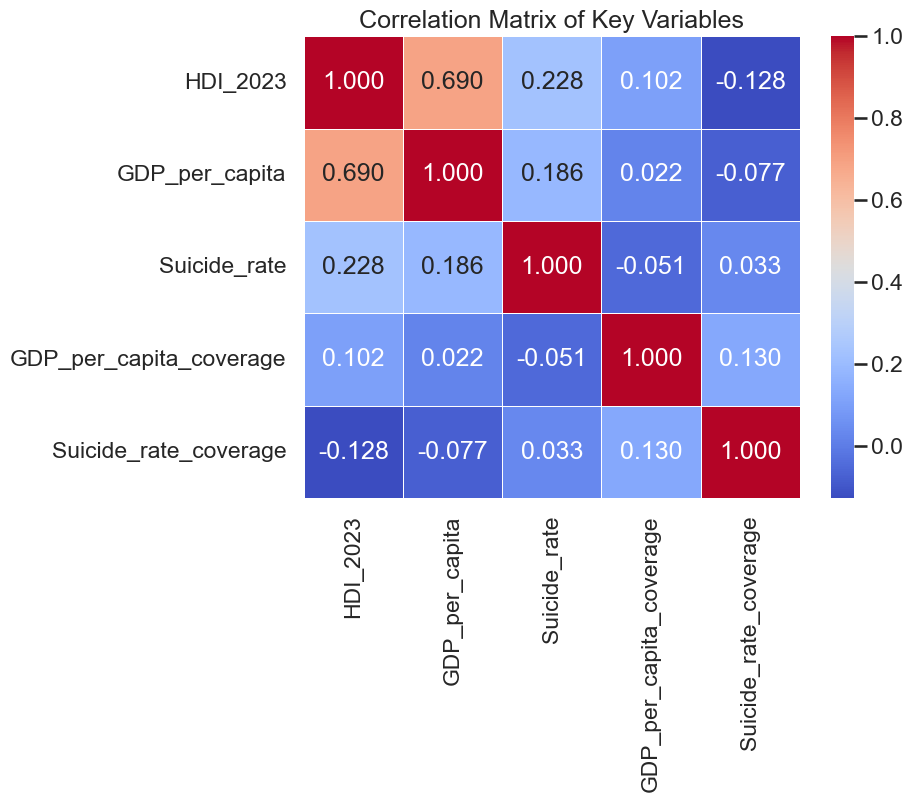

In [ ]:
# Cek korelasi variabel numerik ajah
data_for_corr = df_merge_mean[['HDI_2023', 'GDP_per_capita', 'Suicide_rate', 'GDP_per_capita_coverage', 'Suicide_rate_coverage']]

for col in data_for_corr.columns:
    data_for_corr[col] = pd.to_numeric(data_for_corr[col], errors='coerce')

data_for_corr = data_for_corr.dropna()
corr_matrix = data_for_corr.corr()

print("📈 Korelasi Matrix:")
display(corr_matrix.round(3))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()